In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_dict = {
    "read_air_reserve" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/air_reserve.csv",
    "read_air_store_info" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/air_store_info.csv",
    "read_air_visit_data" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/air_visit_data.csv",
    "read_date_info" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/date_info.csv",
    "read_hpg_reserve" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/hpg_reserve.csv",
    "read_hpg_store_info" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/hpg_store_info.csv",
    "read_sample_submission": "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/sample_submission.csv",
    "read_store_id_relation": "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/store_id_relation.csv"
    
}

# Reservations made in the air system

In [3]:
air_reserve_df = pd.read_csv(path_dict["read_air_reserve"])

In [4]:
air_reserve_df.shape

(92378, 4)

In [5]:
air_reserve_df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [6]:
air_reserve_df.dtypes

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

convert string to datetime 

In [7]:
air_reserve_df["reserve_datetime"] = pd.to_datetime(air_reserve_df["reserve_datetime"])
air_reserve_df["visit_datetime"] = pd.to_datetime(air_reserve_df["visit_datetime"])

- see how many unique restaurants are registered in the air system
- see how many customers per restaurant there are

In [8]:
len(air_reserve_df.air_store_id.unique())

314

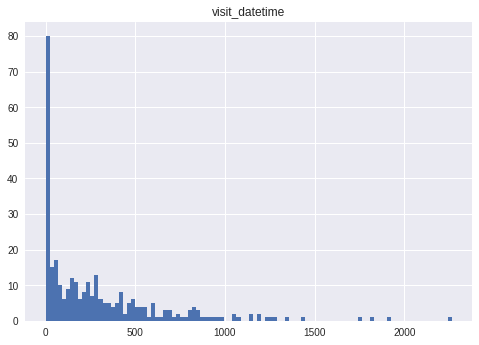

In [9]:
air_reserve_df.groupby("air_store_id").count()["visit_datetime"].to_frame().hist("visit_datetime", bins = 100)
plt.show()

see the difference in hours between reservation time and the actual date of the visit

In [10]:
air_reserve_df["reserve_to_visit_hour"] = air_reserve_df["visit_datetime"] - air_reserve_df["reserve_datetime"]
air_reserve_df["reserve_to_visit_hour"] = air_reserve_df["reserve_to_visit_hour"].apply(lambda x: x.days)

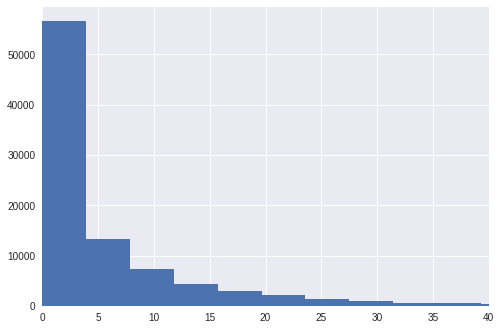

In [12]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0,40)
air_reserve_df["reserve_to_visit_hour"].hist(bins = 100, ax = ax) 
plt.show()

In [58]:
# see whether there is a correlation between number of people and the difference between visit and time of reservation

In [60]:
air_reserve_df[["reserve_to_visit_hour", "reserve_visitors"]].corr()

,reserve_to_visit_hour,reserve_visitors
reserve_to_visit_hour,1.000000,0.172587
reserve_visitors,0.172587,1.000000


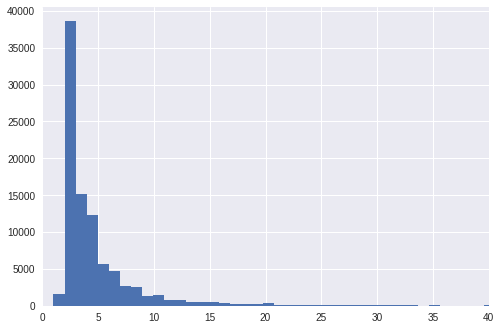

In [13]:
# global distribution of number of people that reserve tables
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0,40)
air_reserve_df["reserve_visitors"].hist(bins = 100, ax = ax) 
plt.show()

# Reservations made in the hpg system

In [15]:
hpg_reserve_df = pd.read_csv(path_dict["read_hpg_reserve"])

In [16]:
hpg_reserve_df.shape

(2000320, 4)

In [17]:
hpg_reserve_df.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [ ]:
hpg_reserve_df